# 🧠 Sieci Neuronowe: MLP (Wielowarstwowy Perceptron)

Celem jest poznanie sieci z warstwą ukrytą (więcej niż jeden perceptron), która rozwiązuje problemy nieliniowe (np. XOR) i klasyfikuje dane Iris (3 klasy).

## 🔄 Od perceptronu do MLP

- Perceptron (linia prosta) nie rozwiąże problemów nieliniowych (np. XOR).
- MLP = warstwa wejściowa → 1+ warstw ukrytych → warstwa wyjściowa.
- Nieliniowość zapewniają funkcje aktywacji (ReLU, Tanh, Sigmoid).

Matematycznie (1 warstwa ukryta):

- Warstwa ukryta: h = f(W₁x + b₁)
- Wyjście: ŷ = g(W₂h + b₂)

f, g – funkcje aktywacji; W, b – wagi i biasy. Uczymy wagi minimalizując błąd (backprop + optymalizacja).

## ❌ XOR – przykład nieliniowy

Dane: (0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0.

Pokażemy, że perceptron sobie nie radzi, a MLP tak.

Perceptron (liniowy) – accuracy: 0.50
MLP (1 warstwa ukryta, 4 neurony) – accuracy: 1.00


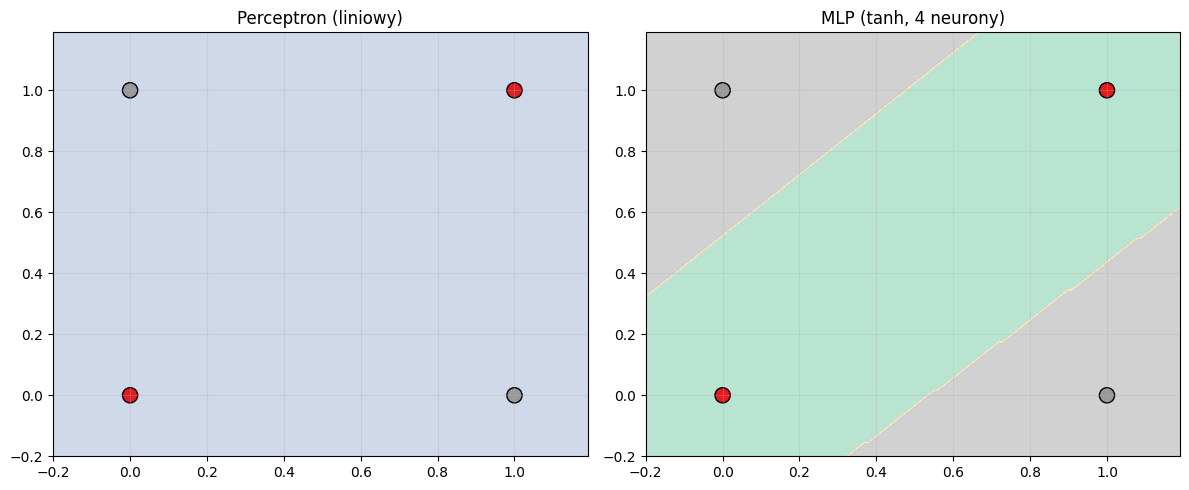

In [8]:
# Importy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Dane XOR
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y_xor = np.array([0,1,1,0], dtype=int)

def plot_decision_boundary(model, X, y, ax, title):
    # Siatka
    h = 0.01
    x_min, x_max = X[:,0].min()-0.2, X[:,0].max()+0.2
    y_min, y_max = X[:,1].min()-0.2, X[:,1].max()+0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Tło decyzji
    ax.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.9)
    # Punkty
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolors='black', s=120)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.grid(True, alpha=0.3)

# Trening: perceptron (liniowy) vs MLP
lin_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42).fit(X_xor, y_xor)
mlp_clf = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='lbfgs',
                        random_state=42, max_iter=5000).fit(X_xor, y_xor)

acc_lin = lin_clf.score(X_xor, y_xor)
acc_mlp = mlp_clf.score(X_xor, y_xor)
print(f"Perceptron (liniowy) – accuracy: {acc_lin:.2f}")
print(f"MLP (1 warstwa ukryta, 4 neurony) – accuracy: {acc_mlp:.2f}")

# Wykresy
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(lin_clf, X_xor, y_xor, axes[0], 'Perceptron (liniowy)')
plot_decision_boundary(mlp_clf, X_xor, y_xor, axes[1], 'MLP (tanh, 4 neurony)')
plt.tight_layout(); plt.show()

Wniosek: perceptron nie rozwiązuje XOR (granica liniowa), MLP – tak (nieliniowa granica).

## 🌸 Iris (3 klasy) – MLP na 2 cechach

Użyjemy cech: petal length i petal width, aby narysować 2D granice decyzyjne. MLP poradzi sobie z nieliniowością i 3 klasami.

Dokładność (test): 77.78%

Raport klasyfikacji:
               precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       1.00      0.33      0.50        15
   virginica       0.62      1.00      0.77        15

    accuracy                           0.78        45
   macro avg       0.85      0.78      0.75        45
weighted avg       0.85      0.78      0.75        45

Macierz pomyłek:
 [[15  0  0]
 [ 1  5  9]
 [ 0  0 15]]


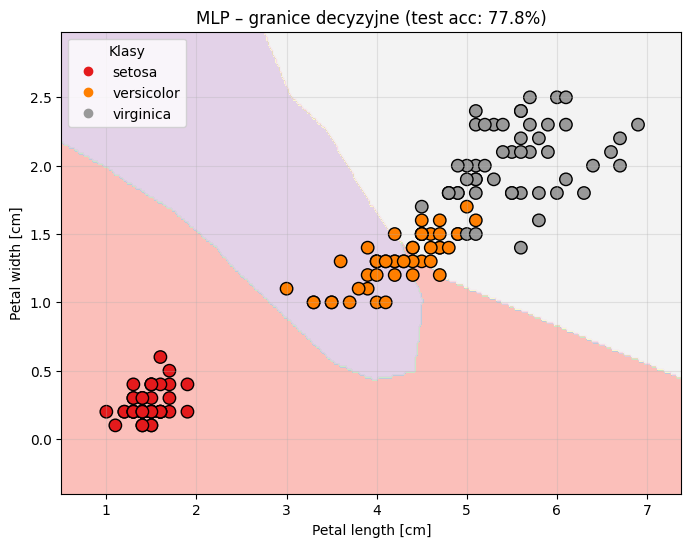

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dane Iris: 2 cechy (petal length, petal width)
iris = load_iris()
X = iris.data[:, 2:4]  # petal length, petal width
y = iris.target        # 0=setosa, 1=versicolor, 2=virginica

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pipeline: skalowanie + MLP
mlp_iris = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,), activation='relu',
                  alpha=1e-3, learning_rate_init=0.01,
                  max_iter=500, early_stopping=True,
                  random_state=42)
)
mlp_iris.fit(X_train, y_train)

y_pred = mlp_iris.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Dokładność (test): {acc:.2%}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))

# Wizualizacja granic decyzyjnych (2D)
h = 0.02
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlp_iris.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.85, cmap=plt.cm.Pastel1)
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolors='black', s=80)
plt.xlabel('Petal length [cm]'); plt.ylabel('Petal width [cm]')
plt.title(f"MLP – granice decyzyjne (test acc: {acc:.1%})")
plt.grid(True, alpha=0.3)
handles, _ = scatter.legend_elements()
plt.legend(handles, iris.target_names, title='Klasy', loc='upper left')
plt.show()

## ✅ Dobre praktyki (MLP)

- Zawsze skaluj cechy (StandardScaler) – szybciej i stabilniej.
- Zacznij prosto: 1 warstwa ukryta (np. 8–32 neuronów), ReLU/Tanh.
- Użyj `early_stopping=True` i sensownego `max_iter` (np. 200–1000).
- Regularyzacja: `alpha` (L2) – większe, gdy overfitting.
- `random_state` dla reprodukowalności.
- Tasuj i stratify podczas splitu; oceniaj na zbiorze testowym.

### 🧩 Architektura MLP – wizualizacja i dobór rozmiaru

- hidden_layer_sizes=(4,) oznacza 1 warstwę ukrytą z 4 neuronami (nie: 4 warstwy).
- Dla XOR minimalnie wystarczą 2 neurony w 1 ukrytej warstwie; 4 dają trochę większą pojemność i stabilność uczenia.
- Architektura ogólna: [wejście] → [ukryta/y] → [wyjście]. Poniżej szybka wizualizacja.

In [14]:
!pip install networkx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch

def draw_mlp(input_dim=2, hidden_layers=(4,), output_dim=1, title='MLP: 2-(4)-1', compact_threshold=20):
    layers = [input_dim] + list(hidden_layers) + [output_dim]
    max_nodes = max(layers)

    # === Tryb KOMPAKTOWY (duże warstwy) ===
    # Rysuje bloki zamiast pojedynczych neuronów, aby uniknąć nachodzenia.
    if max_nodes > compact_threshold or sum(layers) > 60:
        fig, ax = plt.subplots(figsize=(2.0*len(layers)+2, 3.8))
        x_gap = 2.2
        w_box, h_box = 1.5, 2.2
        centers = []
        for li, n in enumerate(layers):
            x = li * x_gap
            # Kolor bloku warstwy
            if li == 0:
                fc = '#fff3e0'  # wejście
                label_top = 'Wejście'
                label_mid = f'{n} wejść'
            elif li == len(layers)-1:
                fc = '#e8f5e9'  # wyjście
                label_top = 'Wyjście'
                label_mid = f'{n} neuronów'
            else:
                fc = '#e8f0fe'  # ukryta
                label_top = f'Ukryta {li}'
                label_mid = f'{n} neuronów'
            # Blok warstwy
            box = FancyBboxPatch((x - w_box/2, -h_box/2), w_box, h_box,
                                  boxstyle='round,pad=0.02,rounding_size=0.08',
                                  fc=fc, ec='black', lw=1.2)
            ax.add_patch(box)
            # Etykiety
            ax.text(x, h_box/2 + 0.12, label_top, ha='center', va='bottom', fontsize=10, fontweight='bold')
            ax.text(x, 0.0, label_mid, ha='center', va='center', fontsize=10)
            centers.append((x, 0.0))
        # Strzałki między warstwami
        for (x1, _), (x2, _) in zip(centers[:-1], centers[1:]):
            ax.annotate('', xy=(x2 - w_box/2, 0), xytext=(x1 + w_box/2, 0),
                        arrowprops=dict(arrowstyle='->', lw=2, color='#9e9e9e'))
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.axis('off')
        ax.set_aspect('equal')
        ax.set_xlim(-1.0, (len(layers)-1)*x_gap + 1.0)
        ax.set_ylim(-1.6, 1.6)
        plt.tight_layout(); plt.show()
        return

    # === Tryb SZCZEGÓŁOWY (małe warstwy) ===
    # Rysuje pojedyncze neurony i pełne połączenia, z dynamicznym odstępem.
    G = nx.DiGraph()
    pos = {}
    x_gap = 3.0
    y_gap = max(0.5, 6.0 / max_nodes)  # mniejszy odstęp dla większej liczby neuronów

    for li, n in enumerate(layers):
        x = li * x_gap
        ys = np.linspace(-(n-1)*y_gap/2, (n-1)*y_gap/2, n) if n > 1 else np.array([0.0])
        for j, y in enumerate(ys):
            node = f'L{li}N{j}'
            G.add_node(node, layer=li)
            pos[node] = (x, y)
            if li > 0:
                for k in range(layers[li-1]):
                    G.add_edge(f'L{li-1}N{k}', node)

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    node_colors = []
    for n in G.nodes():
        layer = G.nodes[n]['layer']
        if layer == 0:
            node_colors.append('#fff3e0')
        elif layer == len(layers)-1:
            node_colors.append('#e8f5e9')
        else:
            node_colors.append('#e8f0fe')

    # Dynamiczny rozmiar węzłów
    base_size = 900
    scale = 10 / max(10, max_nodes)  # mniejszy rozmiar dla większych warstw
    node_size = base_size * scale

    nx.draw(G, pos, ax=ax, with_labels=False, arrows=False,
            node_size=node_size, node_color=node_colors,
            edge_color='#cfcfcf', width=0.9)

    # Etykiety warstw
    for li, n in enumerate(layers):
        x = li * x_gap
        ax.text(x, y_gap*(max_nodes/2 + 0.9),
                'Wejście' if li == 0 else ('Wyjście' if li == len(layers)-1 else f'Ukryta {li}'),
                ha='center', fontsize=10, fontweight='bold')
        ax.text(x, y_gap*(max_nodes/2 + 0.35), f"{n} neuronów" if li != 0 else f"{n} wejść",
                ha='center', fontsize=9, color='gray')

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout(); plt.show()

# Przykład: szczegółowo dla małych sieci i kompaktowo dla dużych (np. 64-(128)-10)
# draw_mlp(input_dim=2, hidden_layers=(4,), output_dim=1, title='MLP: 2-(4)-1')
# draw_mlp(input_dim=64, hidden_layers=(128,), output_dim=10, title='MLP: 64-(128)-10 (Digits)')

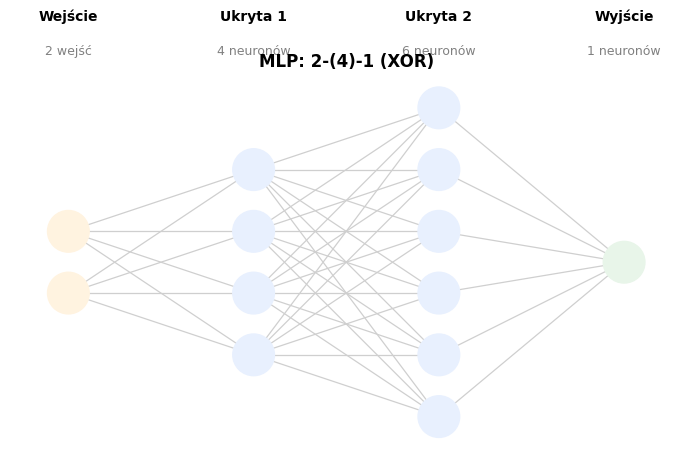

In [17]:
draw_mlp(input_dim=2, hidden_layers=(4,6), output_dim=1, title='MLP: 2-(4)-1 (XOR)')

### ⚡ Funkcje aktywacji – porównanie

Poniżej wykresy: sigmoid (logistic), tanh, ReLU i LeakyReLU. Dla XOR często wybiera się tanh lub ReLU; tanh symetryzuje wyjście (−1..1), co bywa pomocne w małych zabawkowych problemach.

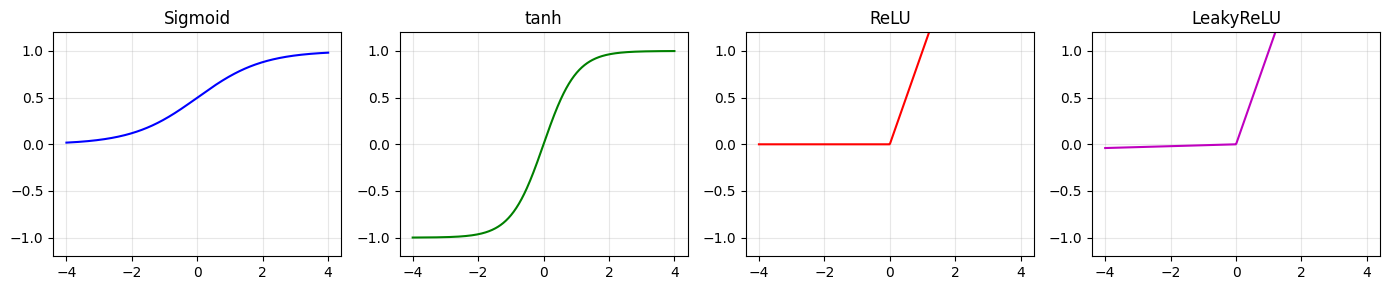

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 400)
sigmoid = 1/(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
leaky_relu = np.where(x>0, x, 0.01*x)

fig, axes = plt.subplots(1, 4, figsize=(14, 3))
axes[0].plot(x, sigmoid, 'b'); axes[0].set_title('Sigmoid')
axes[1].plot(x, tanh, 'g'); axes[1].set_title('tanh')
axes[2].plot(x, relu, 'r'); axes[2].set_title('ReLU')
axes[3].plot(x, leaky_relu, 'm'); axes[3].set_title('LeakyReLU')
for ax in axes: ax.grid(True, alpha=0.3); ax.set_ylim([-1.2, 1.2])
plt.tight_layout(); plt.show()

### 🧪 XOR: różne aktywacje i liczba neuronów

- Minimalnie dla XOR: (2,) neurony w ukrytej warstwie (1 warstwa).
- Więcej neuronów (np. (4,)) daje zapas pojemności, ale nie jest konieczne.

In [ ]:
from sklearn.neural_network import MLPClassifier

configs = [
    ('tanh', (2,)),
    ('tanh', (4,)),
    ('relu', (2,)),
    ('relu', (4,)),
    ('logistic', (2,))
]

for act, hls in configs:
    clf = MLPClassifier(hidden_layer_sizes=hls, activation=act, solver='lbfgs',
                        random_state=42, max_iter=5000).fit(X_xor, y_xor)
    acc = clf.score(X_xor, y_xor)
    print(f"activation={act:8s} hidden={hls!s:8s} → acc={acc:.2f}")

activation=tanh     hidden=(2,)     → acc=0.50
activation=tanh     hidden=(4,)     → acc=1.00
activation=relu     hidden=(2,)     → acc=0.50
activation=relu     hidden=(4,)     → acc=0.75
activation=logistic hidden=(2,)     → acc=0.75


### ⚙️ solver='lbfgs' – co to jest?

- lbfgs: optymalizator drugiego rzędu (quasi-Newton), szybki i stabilny dla małych danych (np. XOR).
- sgd: stochastyczny spadek wzdłuż gradientu; dobry dla dużych zbiorów, wrażliwy na hiperparametry.
- adam: adaptacyjny optymalizator (momentum + adaptacyjne kroki), domyślnie dobry wybór dla większych danych.

Dla małych, zwięzłych problemów (XOR) lbfgs zwykle konwerguje szybciej i pewniej.

### ❓ Kiedy używać której funkcji aktywacji?

- ReLU (domyślnie do warstw ukrytych): szybka, prosta, mniej problemów z zanikającym gradientem. Używaj dla średnich/dużych modeli i danych zeskalowanych. Uwaga na „martwe neurony” (rozważ mniejszy learning_rate).
- LeakyReLU/ELU: gdy ReLU „zamarza” (martwe neurony) lub chcesz przepuszczać małe ujemne wartości; zwykle stabilniejsze niż czysta ReLU na trudniejszych danych.
- Tanh: dobra w małych/„zabawkowych” problemach (np. XOR), bo jest zero-centrowana (−1..1). Uwaga na nasycanie (wolniejsze uczenie w głębszych sieciach).
- Sigmoid: unikaj w warstwach ukrytych (zanikający gradient). Sensowna na wyjściu dla klasyfikacji binarnej (w Keras), w sklearn MLPClassifier dotyczy tylko warstw ukrytych.
- Softmax: wyjście wieloklasowe (Keras). W sklearn MLPClassifier wyjście wieloklasowe używa softmax pod spodem automatycznie (gdy klasy > 2).
- Linear: wyjście dla regresji (bez nieliniowości).

Praktyczne wskazówki:
- Zawsze skaluj cechy (StandardScaler).
- Dla ReLU/LeakyReLU: zwykle lepsze z mini-batch (adam/sgd) i mniejszym η.
- Dla Tanh/Sigmoid: dane dobrze wystandaryzowane wokół zera; rozważ mniejsze η.
- Jeśli uczenie stoi: spróbuj zmienić aktywację (ReLU ↔ Tanh) lub learning_rate/solver.

### 🧮 Solver w MLPClassifier – po co i jak wybrać?

Czym jest solver: algorytm optymalizacji minimalizujący funkcję straty (dobiera wagi/biasy). W sklearn MLPClassifier dostępne:

- lbfgs (quasi-Newton, batch):
  - Szybko i stabilnie na małych zbiorach (np. XOR, setki/do kilku tysięcy próbek).
  - Ignoruje learning_rate/batch_size; brak mini-batch, wyższe zużycie pamięci.
  - Dobry, gdy zależy Ci na pewnej konwergencji na małym zbiorze.
- sgd (stochastic gradient descent, mini-batch):
  - Dla dużych danych; wrażliwy na learning_rate, wymaga strojenia (momentum, schedule).
  - Może być szybszy per-iteracja, ale potrzebuje więcej epok i strojenia.
- adam (adaptacyjny, mini-batch) – często najlepszy default:
  - Dobrze działa „z pudełka” na średnich/dużych danych, mniej wrażliwy na η niż sgd.
  - Wspiera early_stopping, batch_size.

Kiedy który?
- Mały, zwarty problem (XOR, małe Iris 2D): wybierz lbfgs.
- Średni/duży zbiór, klasyfikacja: zacznij od adam; jeśli potrzebujesz pełnej kontroli – sgd.
- Gdy sgd niestabilny: zmniejsz η (learning_rate_init), dodaj momentum, rozważ adam.

Parametry powiązane:
- max_iter, early_stopping, tol – sterują zatrzymaniem.
- learning_rate_init (adam/sgd), learning_rate ('constant'/'invscaling'/'adaptive' – sgd), momentum, nesterovs_momentum (sgd).
- batch_size (adam/sgd; lbfgs przetwarza pełne batch-e).

Podsumowanie wyboru:
- XOR i inne małe zabawki – lbfgs.
- Większość praktycznych klasyfikacji – adam (start).
- Bardzo duże dane lub potrzeba pełnej kontroli – sgd z dopracowanym harmonogramem η.

## 🔢 Klasyfikacja odręcznych cyfr (sklearn Digits 8×8) – MLP

Typowe zadanie szkolne: rozpoznawanie cyfr 0–9 z małych obrazów 8×8. Użyjemy wbudowanego zbioru `load_digits` i prostego MLP (ReLU/Adam).

Dokładność (test): 95.83%

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.88      0.97      0.92        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.95      0.97      0.96        36
           5       1.00      0.97      0.99        37
           6       0.97      0.97      0.97        36
           7       0.95      1.00      0.97        36
           8       0.94      0.83      0.88        35
           9       0.97      0.97      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



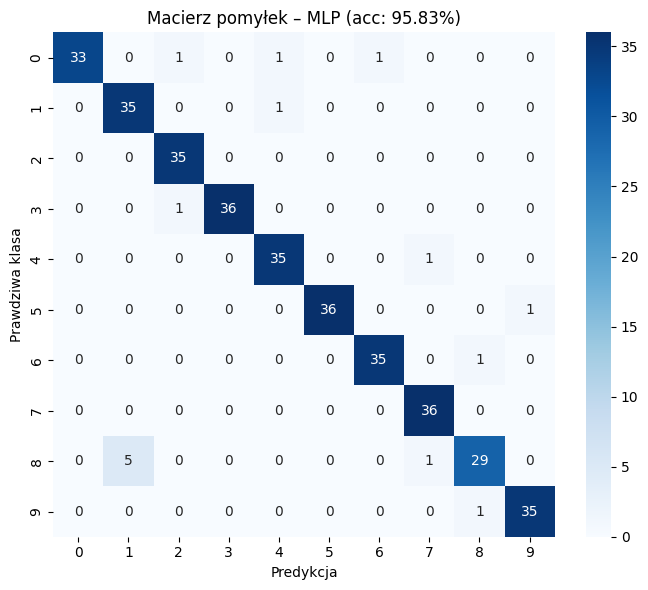

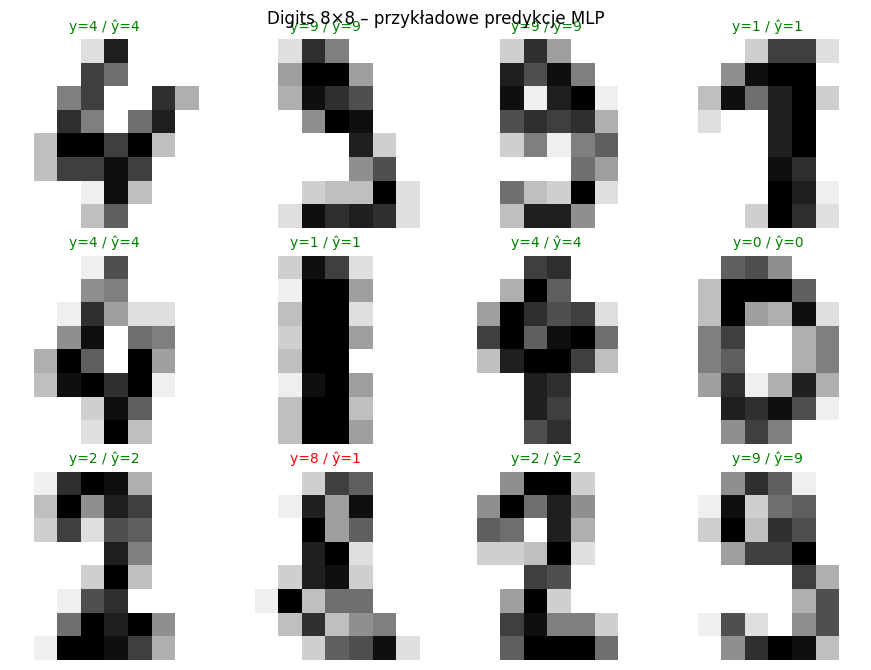

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Dane: Digits (8x8, 10 klas)
digits = load_digits()
X, y = digits.data, digits.target   # X: [n_samples, 64], y: 0..9
class_names = [str(c) for c in digits.target_names]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2) Pipeline: Skalowanie + MLP
mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(128,), activation='relu', solver='adam',
        alpha=1e-4, learning_rate_init=1e-3,
        max_iter=300, early_stopping=True, random_state=42
    )
)
mlp.fit(X_train, y_train)

# 3) Ewaluacja
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Dokładność (test): {acc:.2%}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predykcja'); plt.ylabel('Prawdziwa klasa')
plt.title(f'Macierz pomyłek – MLP (acc: {acc:.2%})')
plt.tight_layout(); plt.show()

# 4) Podgląd predykcji na przykładowych obrazach
rng = np.random.RandomState(42)
idx = rng.choice(len(X_test), size=12, replace=False)
images = X_test[idx].reshape(-1, 8, 8)
true_lbl = y_test[idx]
pred_lbl = y_pred[idx]

fig, axes = plt.subplots(3, 4, figsize=(9, 7))
for ax, img, t, p in zip(axes.ravel(), images, true_lbl, pred_lbl):
    ax.imshow(img, cmap='gray_r')
    color = 'green' if p == t else 'red'
    ax.set_title(f'y={t} / ŷ={p}', color=color, fontsize=10)
    ax.axis('off')
plt.suptitle('Digits 8×8 – przykładowe predykcje MLP', fontsize=12, y=0.95)
plt.tight_layout(); plt.show()

### 🔍 Przykładowy obraz cyfry i jego wektor cech (8×8 → 64)

Kształt obrazu (8x8): (8, 8)
Kształt wektora (64,): (64,)
Etykieta (cyfra): 0
Wektor (pierwsze 32 wartości):
 [ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,  5.,
  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,
  8.,  0.]


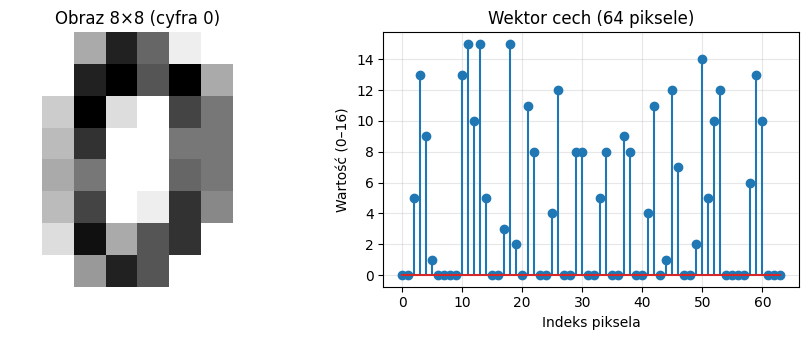

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Załaduj dane Digits
digits = load_digits()
X, y = digits.data, digits.target    # X: [n_samples, 64], y: 0..9

# Wybierz jedną próbkę (np. pierwszą)
i = 0
img = digits.images[i]               # 8x8
label = int(y[i])
vec = X[i]                           # (64,)

print('Kształt obrazu (8x8):', img.shape)
print('Kształt wektora (64,):', vec.shape)
print('Etykieta (cyfra):', label)
print('Wektor (pierwsze 32 wartości):\n', np.array2string(vec[:32], precision=0, separator=', '))

fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
axes[0].imshow(img, cmap='gray_r')
axes[0].set_title(f'Obraz 8×8 (cyfra {label})')
axes[0].axis('off')

# POPRAWKA: usunięto use_line_collection (przestarzały parametr)
axes[1].stem(range(64), vec)
axes[1].set_title('Wektor cech (64 piksele)')
axes[1].set_xlabel('Indeks piksela'); axes[1].set_ylabel('Wartość (0–16)')
axes[1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

### 🧱 Schemat sieci MLP dla Digits (64-(128)-10)

#### 🔢 Dlaczego taka architektura?

**1️⃣ Warstwa wejściowa: 64 neurony**
- Każdy obraz to 8×8 pikseli = **64 piksele**
- Spłaszczamy obraz do wektora: `[pixel₀, pixel₁, ..., pixel₆₃]`
- **Jeden neuron wejściowy = jeden piksel**
- Więc: 64 piksele → 64 neurony wejściowe

**2️⃣ Warstwa ukryta: 128 neuronów**

Liczba neuronów w warstwie ukrytej to **hiperparametr** (dobieramy eksperymentalnie):

**Zasady ogólne:**
- **Za mało neuronów** (<64): sieć nie ma wystarczającej pojemności (underfitting)
- **Za dużo neuronów** (>256): ryzyko przeuczenia (overfitting) + wolniejsze uczenie

**Typowe heurystyki:**
- Liczba ukrytych ∈ [rozmiar wejścia, rozmiar wyjścia]
- Dla Digits (64 wejść, 10 wyjść): dobry zakres to 64–200 neuronów
- **128 neuronów = złoty środek**:
  - 2× więcej niż wejście (wystarczająca pojemność)
  - Nie za dużo (unika overfittingu)
  - W praktyce: dobre wyniki przy rozsądnym czasie treningu

**Dlaczego 128 działa?**
- Digits to stosunkowo prosty problem (małe obrazy 8×8)
- 128 neuronów wystarczy, by nauczyć się wzorców cyfr
- Więcej neuronów (256, 512) niewiele poprawia dokładność
- Mniej neuronów (32, 64) może być za mało

**3️⃣ Warstwa wyjściowa: 10 neuronów**
- **10 cyfr** (0, 1, 2, ..., 9) = **10 klas**
- Każdy neuron wyjściowy reprezentuje jedną cyfrę
- Softmax na wyjściu → prawdopodobieństwa P(cyfra=k)
- Wybieramy cyfrę z **maksymalnym prawdopodobieństwem**

---

#### 📊 Podsumowanie architektury:

```
Obraz 8×8    →  Spłaszczenie  →  Warstwa      →  Warstwa     →  Predykcja
(64 piksele)     do wektora       wejściowa       ukryta          cyfry
                    ↓                ↓              ↓               ↓
                [64 wartości]    64 neuronów    128 neuronów    10 neuronów
                                                  (ReLU)         (Softmax)
```

**Liczba parametrów (wag):**
- Wejście → Ukryta: 64 × 128 = **8,192 wag** + 128 biasów
- Ukryta → Wyjście: 128 × 10 = **1,280 wag** + 10 biasów
- **Razem: ≈9,600 parametrów** do nauczenia

**Porównanie z prostszymi architekturami:**
- 64-(32)-10: ≈2,400 parametrów (może być za mało)
- 64-(64)-10: ≈4,700 parametrów (OK, ale mniej pojemności)
- 64-(128)-10: ≈9,600 parametrów ✅ **optymalny balans**
- 64-(256)-10: ≈19,000 parametrów (ryzyko overfittingu)


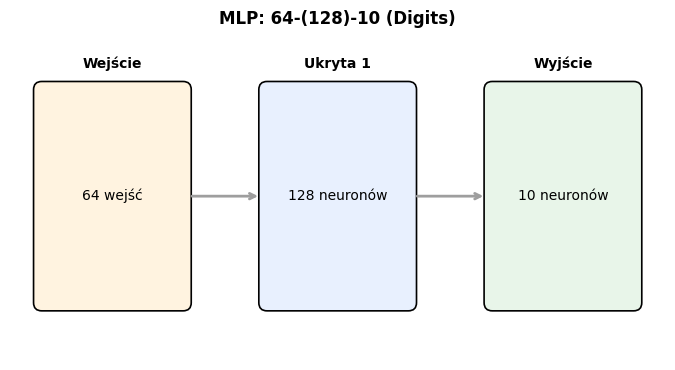


💡 INTERPRETACJA SCHEMATU:
   • Blok 'Wejście': 64 wejść (po jednym na piksel obrazu 8×8)
   • Blok 'Ukryta': 128 neuronów z aktywacją ReLU
   • Blok 'Wyjście': 10 neuronów (po jednym na cyfrę 0–9)
   • Strzałki: pełne połączenia między warstwami (każdy z każdym)


In [ ]:
# Użyj wcześniej zdefiniowanej funkcji draw_mlp do narysowania schematu 64-(128)-10
try:
    draw_mlp(input_dim=64, hidden_layers=(128,), output_dim=10, title='MLP: 64-(128)-10 (Digits)')
    print("\n💡 INTERPRETACJA SCHEMATU:")
    print("   • Blok 'Wejście': 64 wejść (po jednym na piksel obrazu 8×8)")
    print("   • Blok 'Ukryta': 128 neuronów z aktywacją ReLU")
    print("   • Blok 'Wyjście': 10 neuronów (po jednym na cyfrę 0–9)")
    print("   • Strzałki: pełne połączenia między warstwami (każdy z każdym)")
except NameError:
    print('ℹ️ Funkcja draw_mlp nie jest załadowana. Uruchom wcześniej komórkę z definicją draw_mlp (sekcja architektury).')